# **`` Description du data``**

- Plus de 40 classes différentes (43) de panneaux de signalisation
- Plus de 39 000 images au total
- Base de données réaliste et de grande taille, capturée dans des conditions proches du réel



In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import pathlib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.model_selection import train_test_split

2025-04-17 10:25:47.622399: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-17 10:25:47.891033: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-17 10:25:47.987120: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744881948.152338    4090 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744881948.184934    4090 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-17 10:25:48.450465: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [1]:
base_dir = "/home/mohamedplays56/traffic/archive (9)/Train"  # Linux/Mac
img_size = (32, 32)


In [2]:
import os
from collections import Counter

data_dir = "/home/mohamedplays56/traffic/archive (9)/Train"
classes = [folder for folder in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, folder))]

count_dict = {}
for c in classes:
    count_dict[c] = len(os.listdir(os.path.join(data_dir, c)))

print(count_dict)

{'0': 210, '1': 2220, '2': 2250, '3': 1410, '4': 1980, '5': 1860, '6': 420, '7': 1440, '8': 1410, '9': 1470, '10': 2010, '11': 1320, '12': 2100, '13': 2160, '14': 780, '15': 630, '16': 420, '17': 1110, '18': 1200, '19': 210, '20': 360, '21': 330, '22': 390, '23': 510, '24': 270, '25': 1500, '26': 600, '27': 240, '28': 540, '29': 270, '30': 450, '31': 780, '32': 240, '33': 689, '34': 420, '35': 1200, '36': 390, '37': 210, '38': 2070, '39': 300, '40': 360, '41': 240, '42': 240}


In [3]:
CLASS_MAPPING = {
    # Speed limits
    "Speed limit 20": 0,
    "Speed limit 30": 1,
    "Speed limit 50": 2,
    "Speed limit 60": 3,
    "Speed limit 70": 4,
    "Speed limit 80": 5,
    "End of speed limit 80km": 6,
    "Speed limit 100km": 7,
    "Speed limit 120km": 8,
    
    # Prohibitory
    "No passing": 9,
    "No passing for vehicles more 3.5t": 10,
    "Right-of-way at next intersection": 11,
    "Priority road": 12,
    "Yield": 13,
    "Stop": 14,
    "No vehicles": 15,
    "No vehicles more 3.5t": 16,
    "No entry": 17,
    
    # Warning
    "General caution": 18,
    "Dangerous curve to the left": 19,
    "Dangerous curve to the right": 20,
    "Double curve": 21,
    "Bumpy road": 22,
    "Slippery road": 23,
    "Road narrows on the right": 24,
    "Road work": 25,
    "Traffic signals": 26,
    "Pedestrians": 27,
    "Children crossing": 28,
    "Bicycles crossing": 29,
    "Beware of ice and snow": 30,
    "Wild animals crossing": 31,
    
    # Other
    "End of all restrictions": 32,
    "Turn right ahead": 33,
    "Turn left ahead": 34,
    "Ahead only": 35,
    "Go straight or right": 36,
    "Go straight or left": 37,
    "Keep right": 38,
    "Keep left": 39,
    "Roundabout mandatory": 40,
    "End of no passing": 41,
    "End of no passing (trucks)": 42
}

In [5]:
# Add \t to all keys in CLASS_MAPPING
CLASS_MAPPING = {key + "\t": value for key, value in CLASS_MAPPING.items()}

In [10]:
import os

train_path = "/home/mohamedplays56/traffic/archive (9)/Train"

for folder in os.listdir(train_path):
    if folder.endswith('\t'):
        clean_name = folder.strip()  # Removes ALL whitespace (including \t)
        os.rename(
            os.path.join(train_path, folder),
            os.path.join(train_path, clean_name)
        )
        print(f"Renamed: '{folder}' → '{clean_name}'")

Renamed: 'Speed limit 60	' → 'Speed limit 60'
Renamed: 'No passing	' → 'No passing'
Renamed: 'No passing for vehicles more 3.5t	' → 'No passing for vehicles more 3.5t'
Renamed: 'Right-of-way at next intersection	' → 'Right-of-way at next intersection'
Renamed: 'Priority road	' → 'Priority road'
Renamed: 'No vehicles	' → 'No vehicles'
Renamed: 'No vehicles more 3.5t	' → 'No vehicles more 3.5t'
Renamed: 'No entry	' → 'No entry'
Renamed: 'General caution	' → 'General caution'
Renamed: 'Dangerous curve to the left	' → 'Dangerous curve to the left'
Renamed: 'Dangerous curve to the right	' → 'Dangerous curve to the right'
Renamed: 'Double curve	' → 'Double curve'
Renamed: 'Bumpy road	' → 'Bumpy road'
Renamed: 'Slippery road	' → 'Slippery road'
Renamed: 'Road narrows on the right	' → 'Road narrows on the right'
Renamed: 'Road work	' → 'Road work'
Renamed: 'Traffic signals	' → 'Traffic signals'
Renamed: 'Pedestrians	' → 'Pedestrians'
Renamed: 'Children crossing	' → 'Children crossing'
Renamed:

In [11]:
import os

train_path = "/home/mohamedplays56/traffic/archive (9)/Train"
clean_folders = os.listdir(train_path)

# Check for remaining issues
for folder in clean_folders:
    if folder != folder.strip():
        print(f"⚠️ Still has whitespace: '{folder}'")
    if '\t' in folder:
        print(f"⚠️ Contains tab character: '{folder}'")

print("✅ All folders clean!" if not any('\t' in f for f in clean_folders) 
      else "❌ Some folders still need cleaning")

✅ All folders clean!


In [12]:
CLASS_MAPPING = {
    # Speed limits (0-8)
    "Speed limit 20": 0,
    "Speed limit 30": 1,
    "Speed limit 50": 2,
    "Speed limit 60": 3,
    "Speed limit 70": 4,
    "Speed limit 80": 5,
    "End of speed limit 80km": 6,
    "Speed limit 100km": 7,
    "Speed limit 120km": 8,
    
    # Prohibitory (9-17)
    "No passing": 9,
    "No passing for vehicles more 3.5t": 10,
    "Right-of-way at next intersection": 11,
    "Priority road": 12,
    "Yield": 13,
    "Stop": 14,
    "No vehicles": 15,
    "No vehicles more 3.5t": 16,
    "No entry": 17,
    
    # Warning (18-31)
    "General caution": 18,
    "Dangerous curve to the left": 19,
    "Dangerous curve to the right": 20,
    "Double curve": 21,
    "Bumpy road": 22,
    "Slippery road": 23,
    "Road narrows on the right": 24,
    "Road work": 25,
    "Traffic signals": 26,
    "Pedestrians": 27,
    "Children crossing": 28,
    "Bicycles crossing": 29,
    "Beware of ice and snow": 30,
    "Wild animals crossing": 31,
    
    # Other (32-42)
    "End of all restrictions": 32,
    "Turn right ahead": 33,
    "Turn left ahead": 34,
    "Ahead only": 35,
    "Go straight or right": 36,
    "Go straight or left": 37,
    "Keep right": 38,
    "Keep left": 39,
    "Roundabout mandatory": 40,
    "End of no passing": 41,
    "End of no passing (trucks)": 42
}

In [13]:
def load_dataset(train_path):
    images, labels = [], []
    
    for folder_name, class_id in CLASS_MAPPING.items():
        folder_path = os.path.join(train_path, folder_name)
        if not os.path.exists(folder_path):
            print(f"⚠️ Missing folder: {folder_name}")
            continue
            
        for img_file in os.listdir(folder_path):
            if img_file.lower().endswith(('.png', '.jpg', '.jpeg', '.ppm')):
                img = Image.open(os.path.join(folder_path, img_file))
                img = img.convert('RGB').resize((32, 32))
                images.append(np.array(img))
                labels.append(class_id)
    
    return np.array(images), np.array(labels)

X_train, y_train = load_dataset(train_path)
print(f"✅ Loaded {len(X_train)} images | Classes: {np.unique(y_train)}")

NameError: name 'np' is not defined

In [4]:
import os

train_path = "/home/mohamedplays56/traffic/archive (9)/Train"
actual_folders = set(os.listdir(train_path))
expected_folders = set(CLASS_MAPPING.keys())

missing = expected_folders - actual_folders
extra = actual_folders - expected_folders

print("Missing folders:", missing)
print("Extra folders:", extra)

Missing folders: {'Go straight or left', 'No entry', 'Double curve', 'Roundabout mandatory', 'Keep right', 'End of no passing (trucks)', 'No passing for vehicles more 3.5t', 'Turn left ahead', 'Children crossing', 'No vehicles more 3.5t', 'No passing', 'Turn right ahead', 'Slippery road', 'Dangerous curve to the left', 'Road work', 'Pedestrians', 'No vehicles', 'Beware of ice and snow', 'Right-of-way at next intersection', 'Bumpy road', 'Keep left', 'Ahead only', 'Priority road', 'Dangerous curve to the right', 'Road narrows on the right', 'Traffic signals', 'Speed limit 60', 'Go straight or right', 'Bicycles crossing', 'Wild animals crossing', 'End of all restrictions', 'General caution', 'End of no passing'}
Extra folders: {'Go straight or left\t', 'Roundabout mandatory\t', 'Double curve\t', 'End of all restrictions\t', 'Wild animals crossing\t', 'No entry\t', 'Dangerous curve to the right\t', 'Beware of ice and snow\t', 'Bumpy road\t', 'No passing for vehicles more 3.5t\t', 'Right-o

In [2]:
import os
from PIL import Image
import shutil

# Paths
input_dir = '/home/mohamedplays56/traffic/archive (9)/Train'  # Folder that has 0/, 1/, ..., 42/
output_dir = 'path/to/labeled_images'  # New folder to store renamed copies
os.makedirs(output_dir, exist_ok=True)

# List of class names
CLASSES = [  # full list as shown earlier
    "Speed limit (20km/h)", "Speed limit (30km/h)", "Speed limit (50km/h)", "Speed limit (60km/h)",
    "Speed limit (70km/h)", "Speed limit (80km/h)", "End of speed limit (80km/h)", "Speed limit (100km/h)",
    "Speed limit (120km/h)", "No passing", "No passing for vehicles over 3.5 metric tons",
    "Right-of-way at the next intersection", "Priority road", "Yield", "Stop", "No vehicles",
    "Vehicles over 3.5 metric tons prohibited", "No entry", "General caution",
    "Dangerous curve to the left", "Dangerous curve to the right", "Double curve", "Bumpy road",
    "Slippery road", "Road narrows on the right", "Road work", "Traffic signals", "Pedestrians",
    "Children crossing", "Bicycles crossing", "Beware of ice/snow", "Wild animals crossing",
    "End of all speed and passing limits", "Turn right ahead", "Turn left ahead", "Ahead only",
    "Go straight or right", "Go straight or left", "Keep right", "Keep left",
    "Roundabout mandatory", "End of no passing", "End of no passing by vehicles over 3.5 metric tons"
]

# Process and rename images
for label_index in range(len(CLASSES)):
    folder = os.path.join(input_dir, str(label_index))
    class_name = CLASSES[label_index].replace(" ", "_").replace("/", "_")  # Clean file name
    if not os.path.isdir(folder):
        continue
    for i, file in enumerate(os.listdir(folder)):
        img_path = os.path.join(folder, file)
        if not file.lower().endswith(('.png', '.jpg', '.jpeg')):
            continue
        new_filename = f"{class_name}_{i:04d}.jpg"
        new_path = os.path.join(output_dir, new_filename)
        shutil.copy(img_path, new_path)

print("✔️ All images have been renamed and copied!")


✔️ All images have been renamed and copied!


In [3]:
import pandas as pd

df = pd.read_csv("/home/mohamedplays56/traffic/archive (9)/Train.csv")
print(df.head())


   Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  \
0     27      26       5       5      22      20       20   
1     28      27       5       6      23      22       20   
2     29      26       6       5      24      21       20   
3     28      27       5       6      23      22       20   
4     28      26       5       5      23      21       20   

                             Path  
0  Train/20/00020_00000_00000.png  
1  Train/20/00020_00000_00001.png  
2  Train/20/00020_00000_00002.png  
3  Train/20/00020_00000_00003.png  
4  Train/20/00020_00000_00004.png  


In [4]:
from PIL import Image
import numpy as np
import os

X = []
y = []

IMG_SIZE = (32, 32)

# Loop through subfolders (each label is a subfolder name like '0', '1', etc.)
for label in os.listdir(base_dir):
    label_path = os.path.join(base_dir, label)

    if os.path.isdir(label_path):  # ✅ only process folders
        for filename in os.listdir(label_path):
            file_path = os.path.join(label_path, filename)

            if os.path.isfile(file_path):
                try:
                    img = Image.open(file_path).convert("RGB")
                    img = img.resize(IMG_SIZE)
                    X.append(np.array(img, dtype=np.float32) / 255.0)
                    y.append(label)
                except Exception as e:
                    print(f"Erreur avec {file_path}: {e}")

X = np.array(X)
y = np.array(y)
print("Loaded:", X.shape, y.shape)


Loaded: (39209, 32, 32, 3) (39209,)


In [5]:
from tensorflow.keras.preprocessing.image import load_img , img_to_array
from sklearn.preprocessing import LabelEncoder




In [6]:
le = LabelEncoder()
y = le.fit_transform(y)
print("Encoded labels:", y[:400000])  # Show first 10 encoded labels

Encoded labels: [ 0  0  0 ... 42 42 42]


In [7]:
print(f"X shape: {X.shape}")
print(f"y length: {len(y)}")


X shape: (39209, 32, 32, 3)
y length: 39209


In [8]:
# # Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Data Split Done! Train Shape:", X_train.shape, "Test Shape:", X_test.shape)


Data Split Done! Train Shape: (31367, 32, 32, 3) Test Shape: (7842, 32, 32, 3)


In [9]:
print(np.max(y_train))


42


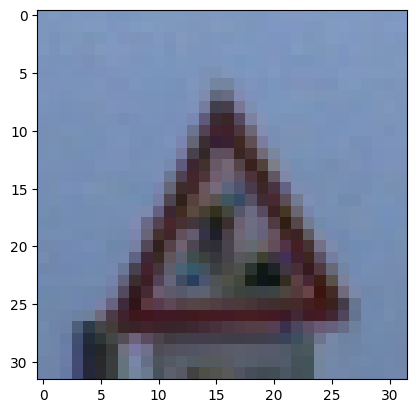

In [11]:
import matplotlib.pyplot as plt
plt.imshow(X_test[1000],cmap='grey')
#plt.imshow(test_images[0],vmin=0, vmax=255)
plt.show()

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras import layers

In [15]:


model = Sequential([
    # Feature Extraction
    Conv2D(30, (7,7), strides=(1,1), padding='same', activation=layers.LeakyReLU(), input_shape=(32, 32, 3)),
    MaxPooling2D((2,2) , strides=(1,1)), 
    Conv2D(64, (3,3),activation=layers.LeakyReLU()),
    MaxPooling2D((2,2) , strides=(1,1)),
    Conv2D(128, (3,3),activation=layers.LeakyReLU()),
      
    # Classifier
    Flatten(),
    Dense(30, activation=layers.LeakyReLU()),
    Dropout(0.2),
    Dense(30, activation=layers.LeakyReLU()),
    Dropout(0.3),
    Dense(43, activation='softmax')
])

model.summary()

/home/mohamedplays56/python/.venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-14 09:25:30.787517: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 30)     │         4,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 30)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        17,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 30)             │     2,595,870 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 43)             │         1,333 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,693,773 (10.28 MB)

 Trainable params: 2,693,773 (10.28 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
##compilation
from tensorflow.keras import losses

opt = tf.keras.optimizers.SGD(0.01)
optadam = tf.keras.optimizers.Adam(learning_rate=0.001)
nadam = tf.keras.optimizers.Nadam()
adamax = tf.keras.optimizers.Adamax()
adagrad = tf.keras.optimizers.Adagrad()
RMSprop = tf.keras.optimizers.RMSprop(learning_rate=0.0001)


model.compile(optimizer=optadam,
              loss=losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [29]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.00001)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=15, batch_size=10, validation_split=0.2, callbacks=[reduce_lr, early_stopping])  # validation_data=(X_val,y_val),





Epoch 1/15
2510/2510 ━━━━━━━━━━━━━━━━━━━━ 234s 91ms/step - accuracy: 0.3935 - loss: 2.2970 - val_accuracy: 0.8492 - val_loss: 0.5494 - learning_rate: 0.0010
Epoch 2/15
2510/2510 ━━━━━━━━━━━━━━━━━━━━ 219s 87ms/step - accuracy: 0.7982 - loss: 0.7407 - val_accuracy: 0.9393 - val_loss: 0.2326 - learning_rate: 0.0010
Epoch 3/15
2510/2510 ━━━━━━━━━━━━━━━━━━━━ 222s 89ms/step - accuracy: 0.8707 - loss: 0.4710 - val_accuracy: 0.9558 - val_loss: 0.1928 - learning_rate: 0.0010
Epoch 4/15
2510/2510 ━━━━━━━━━━━━━━━━━━━━ 226s 90ms/step - accuracy: 0.8782 - loss: 0.4924 - val_accuracy: 0.9546 - val_loss: 0.2042 - learning_rate: 0.0010
Epoch 5/15
2510/2510 ━━━━━━━━━━━━━━━━━━━━ 229s 91ms/step - accuracy: 0.8908 - loss: 0.4072 - val_accuracy: 0.9594 - val_loss: 0.1709 - learning_rate: 0.0010
Epoch 6/15
2510/2510 ━━━━━━━━━━━━━━━━━━━━ 227s 90ms/step - accuracy: 0.9032 - loss: 0.4001 - val_accuracy: 0.9719 - val_loss: 0.1481 - learning_rate: 0.0010
Epoch 7/15
2510/2510 ━━━━━━━━━━━━━━━━━━━━ 260s 90ms/step -

In [30]:
# Évaluer le modèle
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Accuracy sur l\'ensemble de test :', test_acc)

246/246 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9732 - loss: 0.1162
Accuracy sur l'ensemble de test : 0.9779393076896667


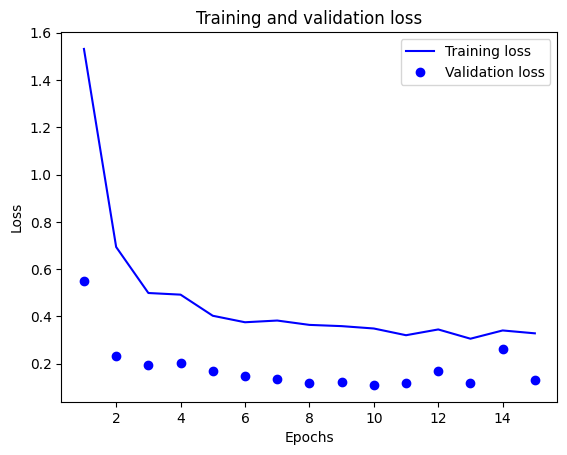

In [31]:
history_dict = history.history
history_dict.keys()
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "b", label="Training loss")
plt.plot(epochs, val_loss_values, "bo", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

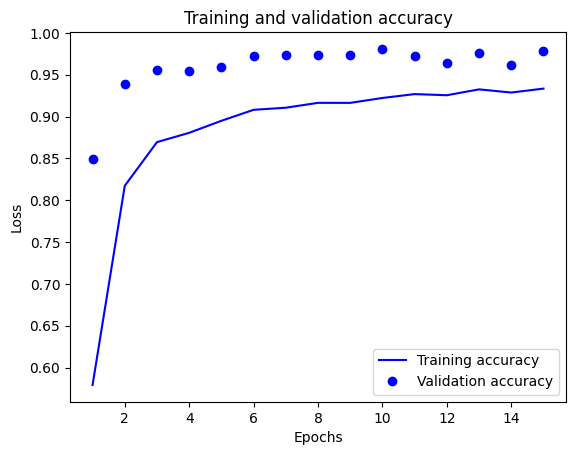

In [32]:
history_dict = history.history
history_dict.keys()
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["accuracy"]
val_loss_values = history_dict["val_accuracy"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "b", label="Training accuracy")
plt.plot(epochs, val_loss_values, "bo", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
disp.plot()
plt.show()

In [1]:
from sklearn.metrics import classification_report, confusion_matrix,precision_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# testing
predictions=model.predict(X_test)
y_pred= np.argmax(predictions, axis=1)
print(y_pred.shape)
print(y_test.shape)
print(y_pred)
#predictions[predictions>0.5]=1
#predictions[predictions<=0.5]=0
#matric confusion
print("***** confusion matric*****")
cm = confusion_matrix(y_pred, y_test)
cm
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
#precision global
print("***** precision*****")
precision_score(y_pred, y_test,average='macro')


NameError: name 'model' is not defined

## `` model 2 ``

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    '/home/mohamedplays56/traffic/archive (9)/Train',
    target_size=(64, 64),     # Tamaño para ResNet
    batch_size=32,
    class_mode='sparse',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    '/home/mohamedplays56/traffic/archive (9)/Train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)

Found 31368 images belonging to 43 classes.
Found 7841 images belonging to 43 classes.


In [14]:


model2 = Sequential([
    # Feature Extraction
    Conv2D(50, (7,7), strides=(1,1), padding='same', activation=layers.LeakyReLU(), input_shape=(64, 64, 3)),
    MaxPooling2D((2,2) , strides=(1,1)), 
    Conv2D(70, (3,3),activation=layers.LeakyReLU()),
    MaxPooling2D((2,2) , strides=(1,1)),
    Conv2D(128, (3,3),activation=layers.LeakyReLU()),
    MaxPooling2D((2,2) , strides=(1,1)),
    Conv2D(200, (3,3),activation=layers.LeakyReLU()),


      
    # Classifier
    Flatten(),
    Dense(30, activation=layers.LeakyReLU()),
    Dropout(0.2),
    Dense(30, activation=layers.LeakyReLU()),
    Dropout(0.3),
    Dense(43, activation='softmax')
])

model2.summary()

/home/mohamedplays56/python/.venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-14 10:45:56.341250: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-04-14 10:45:56.448217: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 72600000 exceeds 10% of free system memory.
2025-04-14 10:45:56.473396: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 72600000 exceeds 10% of free system memory.
2025-04-14 10:45:56.484437: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 72600000 exceeds 10% of free system memor

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 50)     │         7,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 70)     │        31,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 60, 60, 70)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 58, 58, 128)    │        80,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 57, 57, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 55, 55, 200)    │       230,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 605000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 30)             │    18,150,030 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 43)             │         1,333 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,502,631 (70.58 MB)

 Trainable params: 18,502,631 (70.58 MB)

 Non-trainable params: 0 (0.00 B)

# `` transfer ``

In [10]:
X_train=X_train[:1000]
y_train=y_train[:1000]

X_train=X_train.astype('float32')
X_train = tf.image.resize(X_train, [224, 224]).numpy()

2025-04-17 10:27:57.019492: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-04-17 10:27:57.184833: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 602112000 exceeds 10% of free system memory.


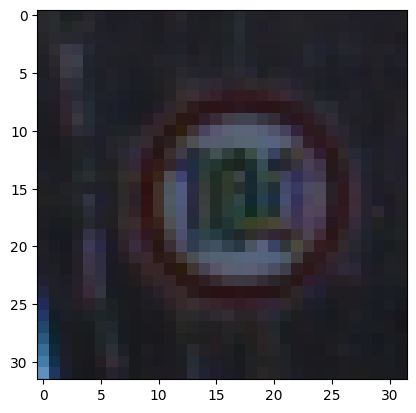

In [11]:
import matplotlib.pyplot as plt
plt.imshow(X_test[500],cmap='grey')
#plt.imshow(test_images[0],vmin=0, vmax=255)
plt.show()

In [15]:




from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers  # Import layers module

# 3. Charger VGG16 sans la partie classification (top), avec les poids ImageNet
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 4. Geler les couches convolutionnelles
for layer in base_model.layers:
    layer.trainable = False

# 5. Ajouter le classifieur personnalisé

model = Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(43, activation='softmax')
])
#model.summary()


In [13]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import losses 
from tensorflow.keras import layers
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,BatchNormalization,Dropout,AveragePooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping,ModelCheckpoint
from tensorflow.keras.datasets import mnist,cifar10

In [14]:
##compilation
opt = tf.keras.optimizers.SGD(0.01)
optadam = tf.keras.optimizers.Adam(0.01)
nadam = tf.keras.optimizers.Nadam()
adamax = tf.keras.optimizers.Adamax()
adagrad = tf.keras.optimizers.Adagrad()
RMSprop = tf.keras.optimizers.RMSprop(learning_rate=0.0001)

model.compile(optimizer=nadam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## fit
# Callbacks pour  ajuster le taux d'apprentisage  et eviter le surapprentissage avec early_stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.01, patience=10, min_lr=0.000001)
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)


history= model.fit(X_train,y_train,epochs=5, batch_size=3,validation_split=0.2, callbacks=[reduce_lr,early_stopping])  # validation_data=(X_val,y_val),

#history= model.fit(train_generator,validation_data=val_generator,epochs=5,callbacks=[reduce_lr,checkpoint])  # validation_data=(X_val,y_val),



Epoch 1/5


2025-04-17 10:28:48.396345: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 481689600 exceeds 10% of free system memory.


267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.0473 - loss: 4.9586

2025-04-17 10:30:43.766986: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 120422400 exceeds 10% of free system memory.



Epoch 1: val_accuracy improved from -inf to 0.07000, saving model to /home/mohamedplays56/best_model.keras
267/267 ━━━━━━━━━━━━━━━━━━━━ 137s 485ms/step - accuracy: 0.0473 - loss: 4.9551 - val_accuracy: 0.0700 - val_loss: 3.7159 - learning_rate: 0.0010
Epoch 2/5
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step - accuracy: 0.0542 - loss: 3.7130
Epoch 2: val_accuracy did not improve from 0.07000
267/267 ━━━━━━━━━━━━━━━━━━━━ 126s 472ms/step - accuracy: 0.0542 - loss: 3.7130 - val_accuracy: 0.0700 - val_loss: 3.6807 - learning_rate: 0.0010
Epoch 3/5
 66/267 ━━━━━━━━━━━━━━━━━━━━ 2:27 732ms/step - accuracy: 0.0171 - loss: 3.6771

KeyboardInterrupt: 